<a href="https://colab.research.google.com/github/Kh0uloud/Optimization-for-City-Public-Transport-Route/blob/main/Transform_the_problem_into_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import numpy as np

In [51]:
df = pd.read_csv("/content/drive/MyDrive/Bio_Inspired_Project/Data/data2023_06.csv")

In [52]:
df

,trip_id,ritnumber,sequence,time,stop_id,lat,lon,stop_code,stop_name,departure,classification,seats,operator,passengers,timestamp,elevation
0,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
1,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
2,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,480,NS,158,1687242240,0
3,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
4,168758612,4016,1,06:24,2511899,51.92499,4.46889,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162349,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162350,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162351,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,400,NS,132,1687221960,0
2162352,166111090,2985,31,00:46,2512035,51.00164,5.85868,STD,Sittard,STD,2,600,NS,198,1687221960,0


In [53]:
df= df.drop_duplicates()

In [54]:
df

,trip_id,ritnumber,sequence,time,stop_id,lat,lon,stop_code,stop_name,departure,classification,seats,operator,passengers,timestamp,elevation
0,168758612,4016,1,06:24,2511899,51.924990,4.468890,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687242240,0
2,168758612,4016,1,06:24,2511899,51.924990,4.468890,RTD,Rotterdam Centraal,RTD,2,480,NS,158,1687242240,0
8,168249727,4034,1,10:54,2511899,51.924990,4.468890,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687258440,0
15,168249727,4034,1,10:54,2511899,51.924990,4.468890,RTD,Rotterdam Centraal,RTD,2,480,NS,158,1687258440,0
16,168249791,4038,1,11:54,2511899,51.924990,4.468890,RTD,Rotterdam Centraal,RTD,2,600,NS,198,1687262040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162325,166111090,2985,30,00:44,2512035,51.016196,5.858848,STD,Sittard,STD,2,400,NS,132,1687221840,0
2162334,166111090,2985,31,00:45,2512035,51.001640,5.858680,STD,Sittard,STD,2,600,NS,198,1687221900,0
2162335,166111090,2985,31,00:45,2512035,51.001640,5.858680,STD,Sittard,STD,2,400,NS,132,1687221900,0
2162344,166111090,2985,31,00:46,2512035,51.001640,5.858680,STD,Sittard,STD,2,600,NS,198,1687221960,0


In [55]:
#we're going to consider the most crowded trips

grouped = df.groupby('trip_id').size().reset_index(name='count')
sorted_trip_ids = grouped.sort_values(by='count', ascending=False)['trip_id'].tolist()

In [56]:
sorted_trip_ids[:100]

[169044861,
 168235670,
 168744511,
 168749642,
 168750139,
 163056096,
 167926240,
 165692845,
 168745155,
 168749941,
 168745237,
 162929904,
 167923049,
 167923022,
 169049709,
 169044935,
 168750170,
 165690088,
 168253082,
 168745225,
 168235808,
 167926729,
 167921565,
 168743790,
 165692290,
 168241284,
 168750387,
 162678480,
 167926846,
 163636774,
 168253116,
 168761657,
 168745536,
 168240015,
 169060416,
 169049979,
 168744144,
 168745609,
 167922693,
 163839810,
 168240546,
 168240350,
 163843342,
 168762176,
 168749917,
 161743561,
 167925584,
 166108573,
 167921605,
 168744756,
 168751697,
 165685557,
 169054210,
 168252092,
 167921541,
 168744782,
 167922840,
 168749989,
 168750042,
 168253011,
 168744591,
 168744091,
 168235622,
 167922743,
 166267793,
 161751116,
 168744819,
 165689872,
 162929601,
 168240127,
 168751298,
 167922793,
 161750959,
 168745485,
 162678500,
 169061774,
 168750291,
 167926145,
 163056710,
 167926737,
 162675029,
 165690022,
 168745558,
 169

In [ ]:
df3

,sequence,distance,passengers,time
0,1,0.000000,362,05:47
1,2,27.142797,362,05:48
17,3,1.706951,362,06:04
18,4,21.502935,362,06:05
30,5,1.738524,362,06:17
31,6,12.400052,362,06:18
39,7,1.561380,362,06:26
40,8,25.357425,1265,06:27
55,9,1.675189,1265,06:42
56,10,63.765325,2400,06:51


In [ ]:
# Delete rows where distance < 2
df3 = df3[df3['distance'] >= 2]

df3['sequence'] = df3['sequence'].astype(str)

# Apply the function to the "sequence" column
df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)

# Drop the last row since it will have NaN value after shifting
df3 = df3.iloc[:-1]

# Display the updated DataFrame
print(df3)

    sequence   distance  passengers   time
1        2-4  27.142797         362  05:48
18       4-6  21.502935         362  06:05
31       6-8  12.400052         362  06:18
40      8-10  25.357425        1265  06:27
56     10-12  63.765325        2400  06:51
91     12-14  19.220238        2499  07:29
104    14-16  30.111697        2104  07:49


<ipython-input-27-8df424757a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sequence'] = df3['sequence'].astype(str)
<ipython-input-27-8df424757a89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)


Take several paths and choose which to adapt

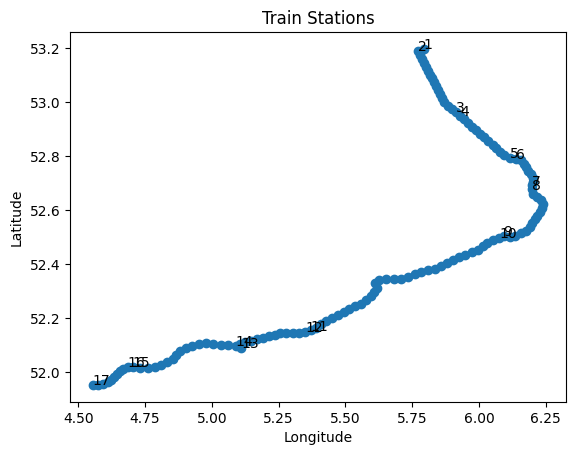

In [ ]:
# Extract longitude and latitude coordinates
longitudes = list(df2.lon)
latitudes = list(df2.lat)

# Plot the train stations
plt.scatter(longitudes, latitudes)

# Add labels to each point
a=0
for index, row in df2.iterrows():
    if row['sequence'] != a:
        plt.annotate(row['sequence'], (row['lon'], row['lat']))
        a= row['sequence']

# Set plot title and axis labels
plt.title('Train Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

In [58]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6367 * c  # Radius of earth in kilometers. Use 3956 for miles
    return km

Transform the dataset of train trips into a TSP-like problem formulation, where train stations represent the cities to be visited, and the distances between stations determine the edge weights. <br>
The code provides a visualization of the train stations' locations, their sequences, and the distances between them. This visualization serves as a basis for further applying the ACO algorithm to solve the TSP, optimizing the order of visiting the train stations for each trip, or maaby changes will happen inter-trips.

iteration  0
iteration  0  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  1
iteration  1  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  2
iteration  2  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  3
iteration  3  is completed

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2


____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  4
iteration  4  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  5
iteration  5  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  6
iteration  6  is completed
_______________________________________

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2


____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  8
iteration  8  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  9
iteration  9  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  10
iteration  10  is completed
_____________________________________

<ipython-input-66-1bf867c49d1b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lon = df2.lon.astype(float)
<ipython-input-66-1bf867c49d1b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lat = df2

iteration  12  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  13
iteration  13  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  14
iteration  14  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  15
iteration  15  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  16  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  17
iteration  17  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  18
iteration  18  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  19
iteration  19  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

 21
iteration  21  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  22
iteration  22  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  23
iteration  23  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  24
iteration  24  is completed
__

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  26  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  27
iteration  27  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  28
iteration  28  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  29
iteration  29  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  31  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  32
iteration  32  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  33
iteration  33  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  34
iteration  34  is completed
______

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  36  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  37
iteration  37  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  38
iteration  38  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  39
iteration  39  is completed
______

<ipython-input-66-1bf867c49d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['distance'] = df2.apply(lambda x: haversine(x['lonshift'], x['latshift'], x['lon'], x['lat']), axis=1)
<ipython-input-66-1bf867c49d1b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['lonshift', 'latshift'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

iteration  40  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  41
iteration  41  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  42
iteration  42  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  43
iteration  43  is completed
______

<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.passengers.astype(int)
<ipython-input-66-1bf867c49d1b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.groupby('time')['passengers'].transform('sum')
<ipython-input-66-1bf867c49d1b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

iteration  44  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  45
iteration  45  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  46
iteration  46  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  47
iteration  47  is completed
______

<ipython-input-66-1bf867c49d1b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['distance'] = df2.apply(lambda x: haversine(x['lonshift'], x['latshift'], x['lon'], x['lat']), axis=1)
<ipython-input-66-1bf867c49d1b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['lonshift', 'latshift'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

48  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  49
iteration  49  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  50
iteration  50  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  51
iteration  51  is completed
_________________

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  53  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  54
iteration  54  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  55
iteration  55  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  56
iteration  56  is completed
______

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  58  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  59
iteration  59  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  60
iteration  60  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  61
iteration  61  is completed
______

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

 62  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  63
iteration  63  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  64
iteration  64  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  65
iteration  65  is completed
________________

<ipython-input-66-1bf867c49d1b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lon = df2.lon.astype(float)
<ipython-input-66-1bf867c49d1b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.lat = df2

iteration  66  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  67
iteration  67  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  68
iteration  68  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  69
iteration  69  is completed
______

<ipython-input-66-1bf867c49d1b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2.groupby('time')['passengers'].transform('sum')
<ipython-input-66-1bf867c49d1b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_index(inplace=True)
<ipython-input-66-1bf867c49d1b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)
<ipyt

iteration  71  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  72
iteration  72  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  73
iteration  73  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  74
iteration  74  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  75  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  76
iteration  76  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  77
iteration  77  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  78
iteration  78  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  79  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  80
iteration  80  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  81
iteration  81  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  82
iteration  82  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  83  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  84
iteration  84  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  85
iteration  85  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  86
iteration  86  is completed
______

<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
<ipython-input-66-1bf867c49d1b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.passengers = df2

iteration  87  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  88
iteration  88  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  89
iteration  89  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  90
iteration  90  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  91  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  92
iteration  92  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  93
iteration  93  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  94
iteration  94  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  95  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  96
iteration  96  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  97
iteration  97  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
iteration  98
iteration  98  is completed
______

<ipython-input-66-1bf867c49d1b>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
<ipython-input-66-1bf867c49d1b>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop_duplicates(inplace=True)
<ipython-input-66-1bf867c49d1b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True

iteration  99  is completed
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 
____________________________________________________________________ 


<Figure size 120000x80000 with 0 Axes>

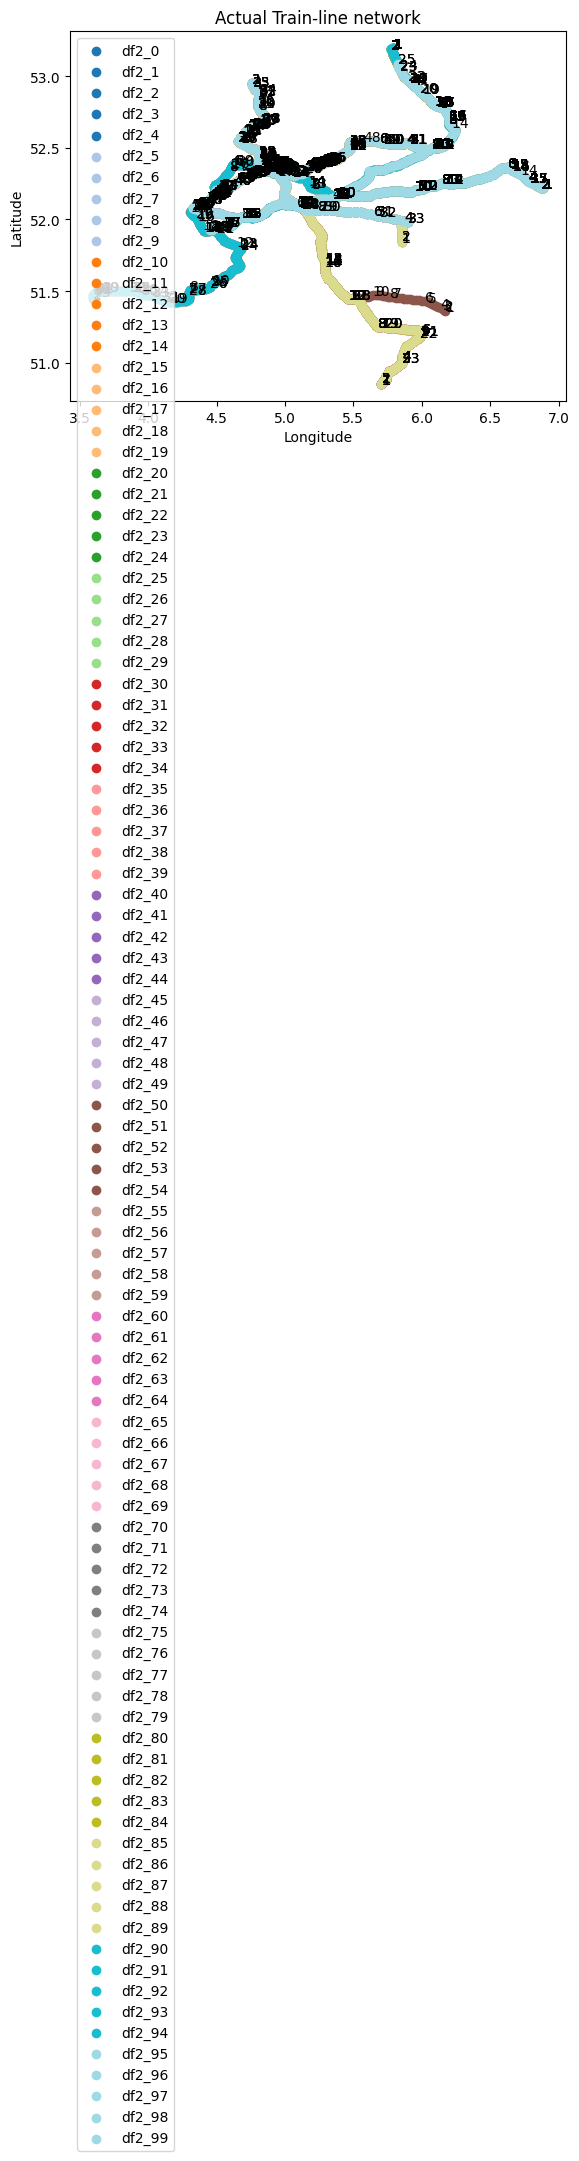

In [66]:
dfs = {}  # Dictionary to store the DataFrames
dfTrips = {}  # Dictionary to show the trips of 10 trains (longest trips)
dfDist = {}  # Dictionary to store distances between Train Stations
LTrainStations= []   #List of Train Stations we will take into consideration

sorted_trip_ids_used= sorted_trip_ids[:100]

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(sorted_trip_ids_used)))

plt.figure(figsize=(1200, 800))
fig, ax = plt.subplots()

for i in range(len(sorted_trip_ids_used)):
    print('iteration ', i)
    var1 = f"df1_{i}"

    # Filter the data based on trip_id
    df1 = df[df['trip_id'] == sorted_trip_ids_used[i]]
    df1.drop_duplicates(inplace=True)
    #df1.set_index('sequence', inplace=True)
    df1.drop(['trip_id', 'ritnumber', 'operator', 'elevation'], axis=1, inplace=True)
    #df1.set_index('time', inplace=True)
    #df1.sort_index(inplace=True)
    # Store the DataFrame in the dictionary
    dfs[var1] = df1

    var2 = f"df2_{i}"

    df2= df1[['sequence', 'lat', 'lon', 'time', 'passengers']]
    df2.passengers = df2.passengers.astype(int)
    df2.passengers = df2.groupby('time')['passengers'].transform('sum')
    df2.set_index('time', inplace=True)
    df2.sort_index(inplace=True)
    df2.drop_duplicates(inplace=True)
    df2.reset_index(inplace=True)

    # Calculate distance
    df2.lon = df2.lon.astype(float)
    df2.lat = df2.lat.astype(float)
    df2['lonshift'] = df2['lon'].shift(1)
    df2['latshift'] = df2['lat'].shift(1)
    df2['distance'] = df2.apply(lambda x: haversine(x['lonshift'], x['latshift'], x['lon'], x['lat']), axis=1)
    df2.drop(['lonshift', 'latshift'], axis=1, inplace=True)
    df2.distance[0]= 0

    # Extract longitude and latitude coordinates
    longitudes = list(df2.lon)
    latitudes = list(df2.lat)
    # Plot the train stations with a specific color
    ax.scatter(longitudes, latitudes, color=colors[i], label=var2)
    # Add labels to each point
    a = [[0, 0]]
    for index, row in df2.iterrows():
        if row['sequence'] != a[-1][1]:
            ax.annotate(row['sequence'], (row['lon'], row['lat']))
            a.append([i, row['sequence'], row['lon'], row['lat']])
    a.pop(0)
    LTrainStations.append(a)


    dfTrips[var2] = df2

    var3 = f"df3_{i}"

    df3=df2[['sequence', 'lon', 'lat', 'distance', 'passengers']]
    df3['distance']= df2.groupby('sequence')['distance'].transform('sum')
    df3.drop_duplicates(inplace=True)
    df3['time']= df2['time']
    df3 = df3[df3['distance'] >= 2]
    df3['sequence'] = df3['sequence'].astype(str)
    df3['sequence'] = df3['sequence'] + '-' + df3['sequence'].shift(-1).astype(str)
    # Drop the last row since it will have NaN value after shifting
    df3 = df3.iloc[:-1]

    dfDist[var3] = df3

    print('iteration ', i, ' is completed')
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )
    print("____________________________________________________________________ " )

# Set plot title and axis labels
ax.set_title('Actual Train-line network')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Add a legend
ax.legend()
plt.show()

Next step <br>
==> Apply ACO <br>
==> See the real map (search for the place in which we're trying to apply a transport re-routing), and apply ACO (maybe in will change the station locations) <br>

In crowded places, we can add stations for example

In [ ]:
LTrainStations

[[[0, 1, 5.79218, 53.19595],
  [0, 2, 5.7718686, 53.189351],
  [0, 3, 5.91442, 52.96149],
  [0, 4, 5.929575693135936, 52.94820853970391],
  [0, 5, 6.11455, 52.79152],
  [0, 6, 6.136923244444445, 52.78782846666667],
  [0, 7, 6.19751, 52.69083],
  [0, 8, 6.197807014925373, 52.67567507462687],
  [0, 9, 6.09194, 52.50472],
  [0, 10, 6.074951246040127, 52.4975148468849],
  [0, 11, 5.37059, 52.15346],
  [0, 12, 5.348841791044776, 52.14890427860696],
  [0, 13, 5.1106, 52.089],
  [0, 14, 5.088552694610779, 52.09730600798403],
  [0, 15, 4.70444, 52.01751],
  [0, 16, 4.684537040816326, 52.01783571428572],
  [0, 17, 4.55363, 51.9518]],
 [[1, 1, 4.46889, 51.92499],
  [1, 2, 4.4512646, 51.9242562],
  [1, 3, 4.55363, 51.9518],
  [1, 4, 4.573492222222223, 51.95326488888889],
  [1, 5, 4.70444, 52.01751],
  [1, 6, 4.730482335766424, 52.01575240875913],
  [1, 7, 5.1106, 52.089],
  [1, 8, 5.106188787878788, 52.10224575757576],
  [1, 9, 5.37059, 52.15346],
  [1, 10, 5.390467, 52.164174583333335],
  [1, 11